In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [113]:
x,y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=5,
    random_state=3,
    shuffle=True
    
)


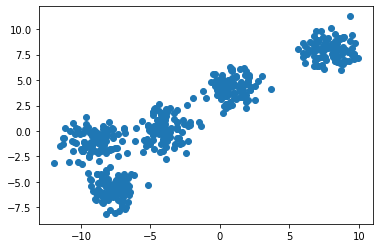

In [114]:
plt.scatter(x[:, 0], x[:, 1])
plt.show()

In [96]:
k = 5

colors = ["red", "green", "yellow", "orange", "blue"]
points = []

clusters = {}

for i in range(k):
    centre = 20*(np.random.random((2))-.5)
    
    clusters[i] = {
        'color':colors[i],
        'points':points,
        'center':centre
    }
    

In [97]:
clusters

{0: {'color': 'red',
  'points': [],
  'center': array([-8.01161846, -7.49276997])},
 1: {'color': 'green',
  'points': [],
  'center': array([-1.36190044,  2.02442222])},
 2: {'color': 'yellow',
  'points': [],
  'center': array([-2.89851957,  7.34997301])},
 3: {'color': 'orange',
  'points': [],
  'center': array([ 5.59455294, -4.79032771])},
 4: {'color': 'blue',
  'points': [],
  'center': array([ 2.00623224, -3.95237214])}}

In [98]:


def distance(a,b):
    return np.sqrt(np.sum((a-b)**2))
    
def assignPtsToClusters(clusters,X):
    m =X.shape[0]
    
    for ix in range(m):
        dist = []
        for kx in range(k):
            d = distance(X[ix],clusters[kx]['center'])
            dist.append(d)
            
        cluster_idx = np.argmin(dist)
        clusters[cluster_idx]['points'].append(X[ix])
        

def updateClusterCenters(clusters):
    
    
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0:
            new_coordinates = np.mean(pts,axis=0)
            clusters[kx]['center'] = new_coordinates
            clusters[kx]['points'] = []



In [99]:
def plotClusters(clusters):

    for i in range(k):
        pts = np.array(clusters[i]['points'])
        if pts.shape[0]>0:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[i]['color'])
        plt.scatter(clusters[i]['center'][0],clusters[i]['center'][1],marker='*',color='black')
        
    plt.show()

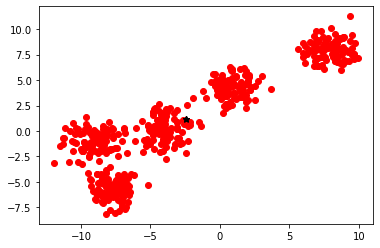

In [105]:
assignPtsToClusters(clusters, x)
plotClusters(clusters)
updatePtsToClusters(clusters)